# 데이터 수집

In [1]:
import yfinance as yf

# 1. 애플(AAPL)의 주식 티커 데이터 가져오기
symbol = 'AAPL'
ticker = yf.Ticker(symbol)

ticker_info = ticker.info
ticker_info

# 2. 주가 데이터 가져오기 (최근 1년 간의 일일 주가 데이터)
# stock_data = ticker.history(period='1y')
# stock_data

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

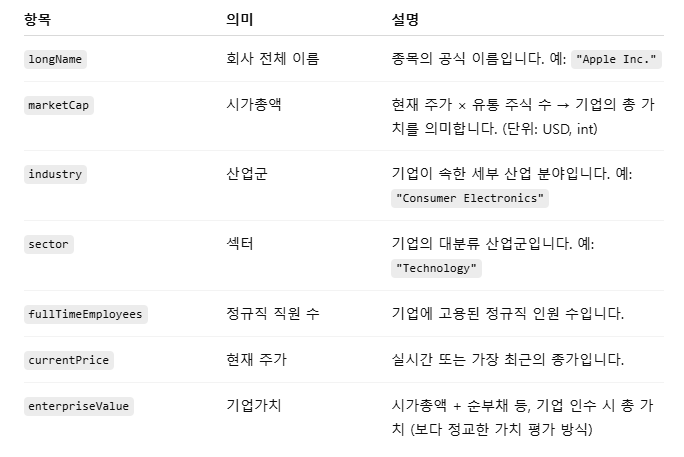

In [20]:
# ticker_info['shortName']
ticker_info.get('shortName')

'Apple Inc.'

In [21]:
# 현재 날짜
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

# 기본 정보
ticker_info = ticker.info    
ticker_info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [22]:
import pandas as pd

basic_info = pd.DataFrame.from_dict(
     ticker.info, orient='index', columns=['Value'])
basic_info

,Value
address1,One Apple Park Way
city,Cupertino
state,CA
zip,95014
country,United States
...,...
epsTrailingTwelveMonths,6.47
epsForward,8.31
marketState,PREPRE
displayName,Apple


In [ ]:


name = ticker_info.get('longName', 'N/A')                 # 회사 이름
exchange = ticker_info.get('marketCap', 'N/A')            # 거래소(시장)
industry = ticker_info.get('industry', 'N/A')             # 산업
sector = ticker_info.get('sector', 'N/A')                 # 섹터
employees = ticker_info.get('fullTimeEmployees', 'N/A')   # 총 직원 수
current_price = ticker_info.get('currentPrice', 'N/A')    # 최근 주가
market_cap = ticker_info.get('enterpriseValue', 'N/A')    # 기업 가치 (시가총액)

- 보고서 생성 템플릿 

In [6]:
# 마크다운 형식의 보고서 생성
report = f"""
# {name} ({ticker}) 기업 정보 보고서

**작성일**: {today}

---
## 1. 회사 정보
- **종목명**: {name}
- **거래소(시장)**: {exchange}
- **산업**: {industry}
- **섹터**: {sector}
- **총 직원 수**: {employees}

---

## 2. 주식 및 기업 가치
- **최근 주가**: {current_price} USD
- **기업 가치 (시가총액)**: {market_cap:,} USD

"""

In [7]:
# 보고서 출력
print(report)


# Apple Inc. (AAPL) 기업 정보 보고서

**작성일**: 2025-06-07

---
## 1. 회사 정보
- **종목명**: Apple Inc.
- **거래소(시장)**: 3045708267520
- **산업**: Consumer Electronics
- **섹터**: Technology
- **총 직원 수**: 164000

---

## 2. 주식 및 기업 가치
- **최근 주가**: 203.92 USD
- **기업 가치 (시가총액)**: 3,095,401,594,880 USD




# 재무제표 데이터 수집

## 손익계산서

In [29]:
income_stmt = ticker.income_stmt.loc[['Total Revenue', 'Gross Profit',
                         'Operating Income', 'Net Income']].iloc[:, :4].to_markdown()
print(income_stmt)

|                  |   2024-09-30 00:00:00 |   2023-09-30 00:00:00 |   2022-09-30 00:00:00 |   2021-09-30 00:00:00 |
|:-----------------|----------------------:|----------------------:|----------------------:|----------------------:|
| Total Revenue    |           3.91035e+11 |           3.83285e+11 |           3.94328e+11 |           3.65817e+11 |
| Gross Profit     |           1.80683e+11 |           1.69148e+11 |           1.70782e+11 |           1.52836e+11 |
| Operating Income |           1.23216e+11 |           1.14301e+11 |           1.19437e+11 |           1.08949e+11 |
| Net Income       |           9.3736e+10  |           9.6995e+10  |           9.9803e+10  |           9.468e+10   |


# 대차대조표

In [31]:
balance_sheet = ticker.balance_sheet.loc[['Total Assets', 
                        'Total Liabilities Net Minority Interest',
                        'Stockholders Equity']].iloc[:, :4].to_markdown()
print(balance_sheet)

|                                         |   2024-09-30 00:00:00 |   2023-09-30 00:00:00 |   2022-09-30 00:00:00 |   2021-09-30 00:00:00 |
|:----------------------------------------|----------------------:|----------------------:|----------------------:|----------------------:|
| Total Assets                            |            3.6498e+11 |           3.52583e+11 |           3.52755e+11 |           3.51002e+11 |
| Total Liabilities Net Minority Interest |            3.0803e+11 |           2.90437e+11 |           3.02083e+11 |           2.87912e+11 |
| Stockholders Equity                     |            5.695e+10  |           6.2146e+10  |           5.0672e+10  |           6.309e+10   |


In [ ]:
# 현금흐름표 (Cash Flow Statement)
cash_flow = ticker.cashflow
print("\n현금흐름표 (Cash Flow Statement):")
# print(cash_flow)
print(type(cash_flow))


현금흐름표 (Cash Flow Statement):
<class 'pandas.core.frame.DataFrame'>


In [14]:
cash_flow.head()

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Free Cash Flow,108807000000.0,99584000000.0,111443000000.0,92953000000.0,NaN
Repurchase Of Capital Stock,-94949000000.0,-77550000000.0,-89402000000.0,-85971000000.0,NaN
Repayment Of Debt,-9958000000.0,-11151000000.0,-9543000000.0,-8750000000.0,NaN
Issuance Of Debt,0.0,5228000000.0,5465000000.0,20393000000.0,NaN
Issuance Of Capital Stock,NaN,NaN,NaN,1105000000.0,880000000.0


In [32]:
cashflow = ticker.cashflow.loc[['Operating Cash Flow', 
                                    'Investing Cash Flow',
                                    'Financing Cash Flow']].iloc[:, :4].to_markdown()
print(cashflow)

|                     |   2024-09-30 00:00:00 |   2023-09-30 00:00:00 |   2022-09-30 00:00:00 |   2021-09-30 00:00:00 |
|:--------------------|----------------------:|----------------------:|----------------------:|----------------------:|
| Operating Cash Flow |           1.18254e+11 |           1.10543e+11 |           1.22151e+11 |           1.04038e+11 |
| Investing Cash Flow |           2.935e+09   |           3.705e+09   |          -2.2354e+10  |          -1.4545e+10  |
| Financing Cash Flow |          -1.21983e+11 |          -1.08488e+11 |          -1.10749e+11 |          -9.3353e+10  |


In [ ]:
# 최근 6개월 간의 주가 데이터를 가져오기 (기간 설정 가능: "1mo", "3mo", "6mo", "1y" 등)
# interval 옵션은 데이터 수집 간격을 의미 (e.g., "1d": 일간 데이터, "1wk": 주간 데이터, "1mo": 월간 데이터)
hist = ticker.history(period="6mo", interval="1d")

# 주가 데이터 출력 (OHLC 및 거래량)
print(hist[['Open', 'High', 'Low', 'Close', 'Volume']])
# print(type(hist))

                                 Open        High         Low       Close  \
Date                                                                        
2024-12-09 00:00:00-05:00  241.248046  246.645031  241.168237  246.156204   
2024-12-10 00:00:00-05:00  246.295865  247.612695  244.749592  247.173752   
2024-12-11 00:00:00-05:00  247.363284  250.196445  245.667363  245.896820   
2024-12-12 00:00:00-05:00  246.295864  248.141418  245.088769  247.363297   
2024-12-13 00:00:00-05:00  247.223631  248.690080  245.647432  247.532883   
...                               ...         ...         ...         ...   
2025-06-02 00:00:00-04:00  200.279999  202.130005  200.119995  201.699997   
2025-06-03 00:00:00-04:00  201.350006  203.770004  200.960007  203.270004   
2025-06-04 00:00:00-04:00  202.910004  206.240005  202.100006  202.820007   
2025-06-05 00:00:00-04:00  203.500000  204.750000  200.149994  200.630005   
2025-06-06 00:00:00-04:00  203.000000  205.699997  202.050003  203.919998   